In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [23]:
house = pd.read_csv("C:/Users/chandraprakash/Desktop/HousePrices.csv")

In [24]:
house.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
house.shape

(2073, 81)

In [26]:
house.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

In [27]:
house.isnull().sum()

Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 81, dtype: int64

In [28]:
house['PoolQC'].isnull().sum()

2065

In [29]:
house['YearBuilt'].head(25)

0     2003
1     1976
2     2001
3     1915
4     2000
5     1993
6     2004
7     1973
8     1931
9     1939
10    1965
11    2005
12    1962
13    2006
14    1960
15    1929
16    1970
17    1967
18    2004
19    1958
20    2005
21    1930
22    2002
23    1976
24    1968
Name: YearBuilt, dtype: int64

# we need to select particular column to perfom the train test

In [30]:
f = ['Property_Sale_Price', 'Dwell_Type', 'LotArea', 'Property_Shape',  'LotConfig', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF','1stFlrSF',
       '2ndFlrSF','GrLivArea','FullBath','BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'GarageYrBlt', 'MiscVal', 'YrSold', 'SaleCondition']
house = house[f]
house.shape

(2073, 29)

In [31]:
house['current_Year'] = 2021

In [32]:
house["year_of_old"] = house['current_Year']- house['YearBuilt']

In [45]:
house.columns

Index(['Property_Sale_Price', 'Dwell_Type', 'LotArea', 'Property_Shape',
       'LotConfig', 'HouseStyle', 'OverallQual', 'YearRemodAdd', 'RoofStyle',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'GarageYrBlt', 'MiscVal', 'YrSold', 'SaleCondition', 'year_of_old'],
      dtype='object')

In [66]:
house.head(1)

,Property_Sale_Price,Dwell_Type,LotArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,GarageYrBlt,MiscVal,YrSold,year_of_old
0,208500,60,8450,7,856,856,854,1710,2,3,2003.0,0,2008,18


In [85]:
f = ['Property_Sale_Price', 'Dwell_Type', 'LotArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr','GarageYrBlt', 'MiscVal', 'YrSold', 'year_of_old']
data = house[f]
data.shape

(1895, 14)

In [86]:
data.head()

,Property_Sale_Price,Dwell_Type,LotArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,GarageYrBlt,MiscVal,YrSold,year_of_old
0,208500,60,8450,7,856,856,854,1710,2,3,2003.0,0,2008,18
1,181500,20,9600,6,1262,1262,0,1262,2,3,1976.0,0,2007,45
2,223500,60,11250,7,920,920,866,1786,2,3,2001.0,0,2008,20
3,140000,70,9550,7,756,961,756,1717,1,3,1998.0,0,2006,106
4,250000,60,14260,8,1145,1145,1053,2198,2,4,2000.0,0,2008,21


In [34]:
house.drop(['YearBuilt'],axis=1,inplace=True)

In [35]:
house.drop(['current_Year'],axis=1,inplace=True)

In [87]:
data.shape

(1895, 14)

In [37]:
house['LotArea'].unique()
house['Property_Shape'].unique()
house['HouseStyle'].unique()
house['OverallQual'].unique()
house['SaleCondition'].unique()


array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [88]:
data.isnull().sum()

Property_Sale_Price    0
Dwell_Type             0
LotArea                0
OverallQual            0
TotalBsmtSF            0
1stFlrSF               0
2ndFlrSF               0
GrLivArea              0
FullBath               0
BedroomAbvGr           0
GarageYrBlt            0
MiscVal                0
YrSold                 0
year_of_old            0
dtype: int64

# still we get some of missing values so we need to drop it

In [70]:
house = house.dropna()
house.shape

(1895, 14)

In [71]:
house.isnull().sum()

Property_Sale_Price    0
Dwell_Type             0
LotArea                0
OverallQual            0
TotalBsmtSF            0
1stFlrSF               0
2ndFlrSF               0
GrLivArea              0
FullBath               0
BedroomAbvGr           0
GarageYrBlt            0
MiscVal                0
YrSold                 0
year_of_old            0
dtype: int64

In [89]:
data.describe()

,Property_Sale_Price,Dwell_Type,LotArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,GarageYrBlt,MiscVal,YrSold,year_of_old
count,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000
mean,187039.188918,59.940897,10842.980475,6.322955,1094.511346,1178.467018,355.585752,1538.708707,1.579947,2.870712,1980.617414,40.065435,2007.838522,49.965172
std,78368.996225,166.521841,9450.571182,1.470289,398.140624,377.621480,443.542563,514.304096,0.543580,0.776953,24.249360,441.127532,1.331248,29.879039
min,35311.000000,20.000000,1300.000000,2.000000,105.000000,438.000000,0.000000,438.000000,0.000000,0.000000,1906.000000,0.000000,2006.000000,11.000000
25%,135000.000000,20.000000,7758.000000,5.000000,817.500000,902.000000,0.000000,1151.000000,1.000000,2.000000,1963.000000,0.000000,2007.000000,21.000000
50%,170000.000000,50.000000,9600.000000,6.000000,1019.000000,1110.000000,0.000000,1484.000000,2.000000,3.000000,1985.000000,0.000000,2008.000000,48.000000
75%,221250.000000,70.000000,11708.500000,7.000000,1319.000000,1414.000000,744.000000,1801.000000,2.000000,3.000000,2003.000000,0.000000,2009.000000,68.000000
max,755000.000000,7080.000000,215245.000000,10.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,6.000000,2019.000000,15500.000000,2010.000000,141.000000


In [90]:
data.head()

,Property_Sale_Price,Dwell_Type,LotArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,GarageYrBlt,MiscVal,YrSold,year_of_old
0,208500,60,8450,7,856,856,854,1710,2,3,2003.0,0,2008,18
1,181500,20,9600,6,1262,1262,0,1262,2,3,1976.0,0,2007,45
2,223500,60,11250,7,920,920,866,1786,2,3,2001.0,0,2008,20
3,140000,70,9550,7,756,961,756,1717,1,3,1998.0,0,2006,106
4,250000,60,14260,8,1145,1145,1053,2198,2,4,2000.0,0,2008,21


In [91]:
data["Property_Sale_Price"].describe()

count      1895.000000
mean     187039.188918
std       78368.996225
min       35311.000000
25%      135000.000000
50%      170000.000000
75%      221250.000000
max      755000.000000
Name: Property_Sale_Price, dtype: float64

In [92]:
X = data[f[1:]]
y = data["Property_Sale_Price"]

# split the data set into training a data:

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1516, 13)
(379, 13)
(1516,)
(379,)


In [94]:
ln = LinearRegression()
ln.fit(X_train,y_train)
print(ln.coef_)

[-1.37151950e+01  4.06377048e-01  6.62726790e+03  4.93479092e+01
  6.36971707e+01  6.64783611e+01  2.39636103e+01  5.36338735e+03
 -1.51103294e+04  3.61085091e+02 -5.39642457e-01  2.99014619e+02
 -2.81169679e+02]


# create a prediction

In [117]:
ln.coef_.sum()

-3275.4527095997955

In [116]:
y_test_predict = ln.predict(X_test)
print(y_test_predict.shape)

(379,)


### error plot

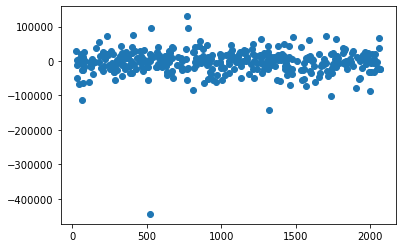

In [97]:
g = plt.plot((y_test - y_test_predict),marker = 'o', linestyle= '')

## fit the regression model without b(w0)

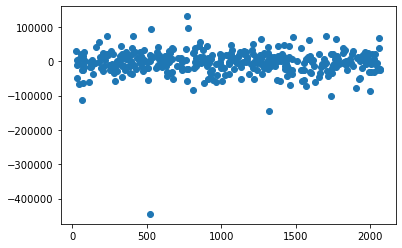

In [98]:
ln = LinearRegression(fit_intercept=False)
ln.fit(X_train,y_train)

y_test_predict = ln.predict(X_test)
g = plt.plot((y_test - y_test_predict),marker = 'o', linestyle= '')

<AxesSubplot:>

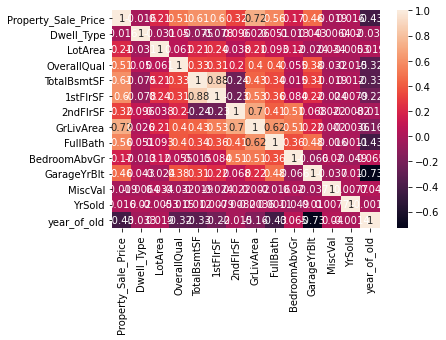

In [105]:
# check for any correlations between variables
corr = data.corr()
sns.heatmap(corr, annot=True)
#  seem to have a 
# 1stFlrSF ,TotalBsmtSF  high influence in price

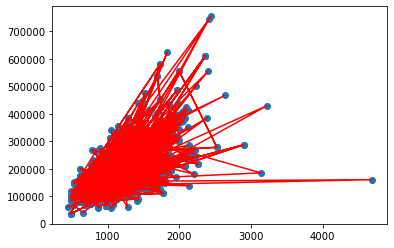

In [103]:
plt.scatter(x, y)
plt.plot(x,y, color='red')
plt.show()

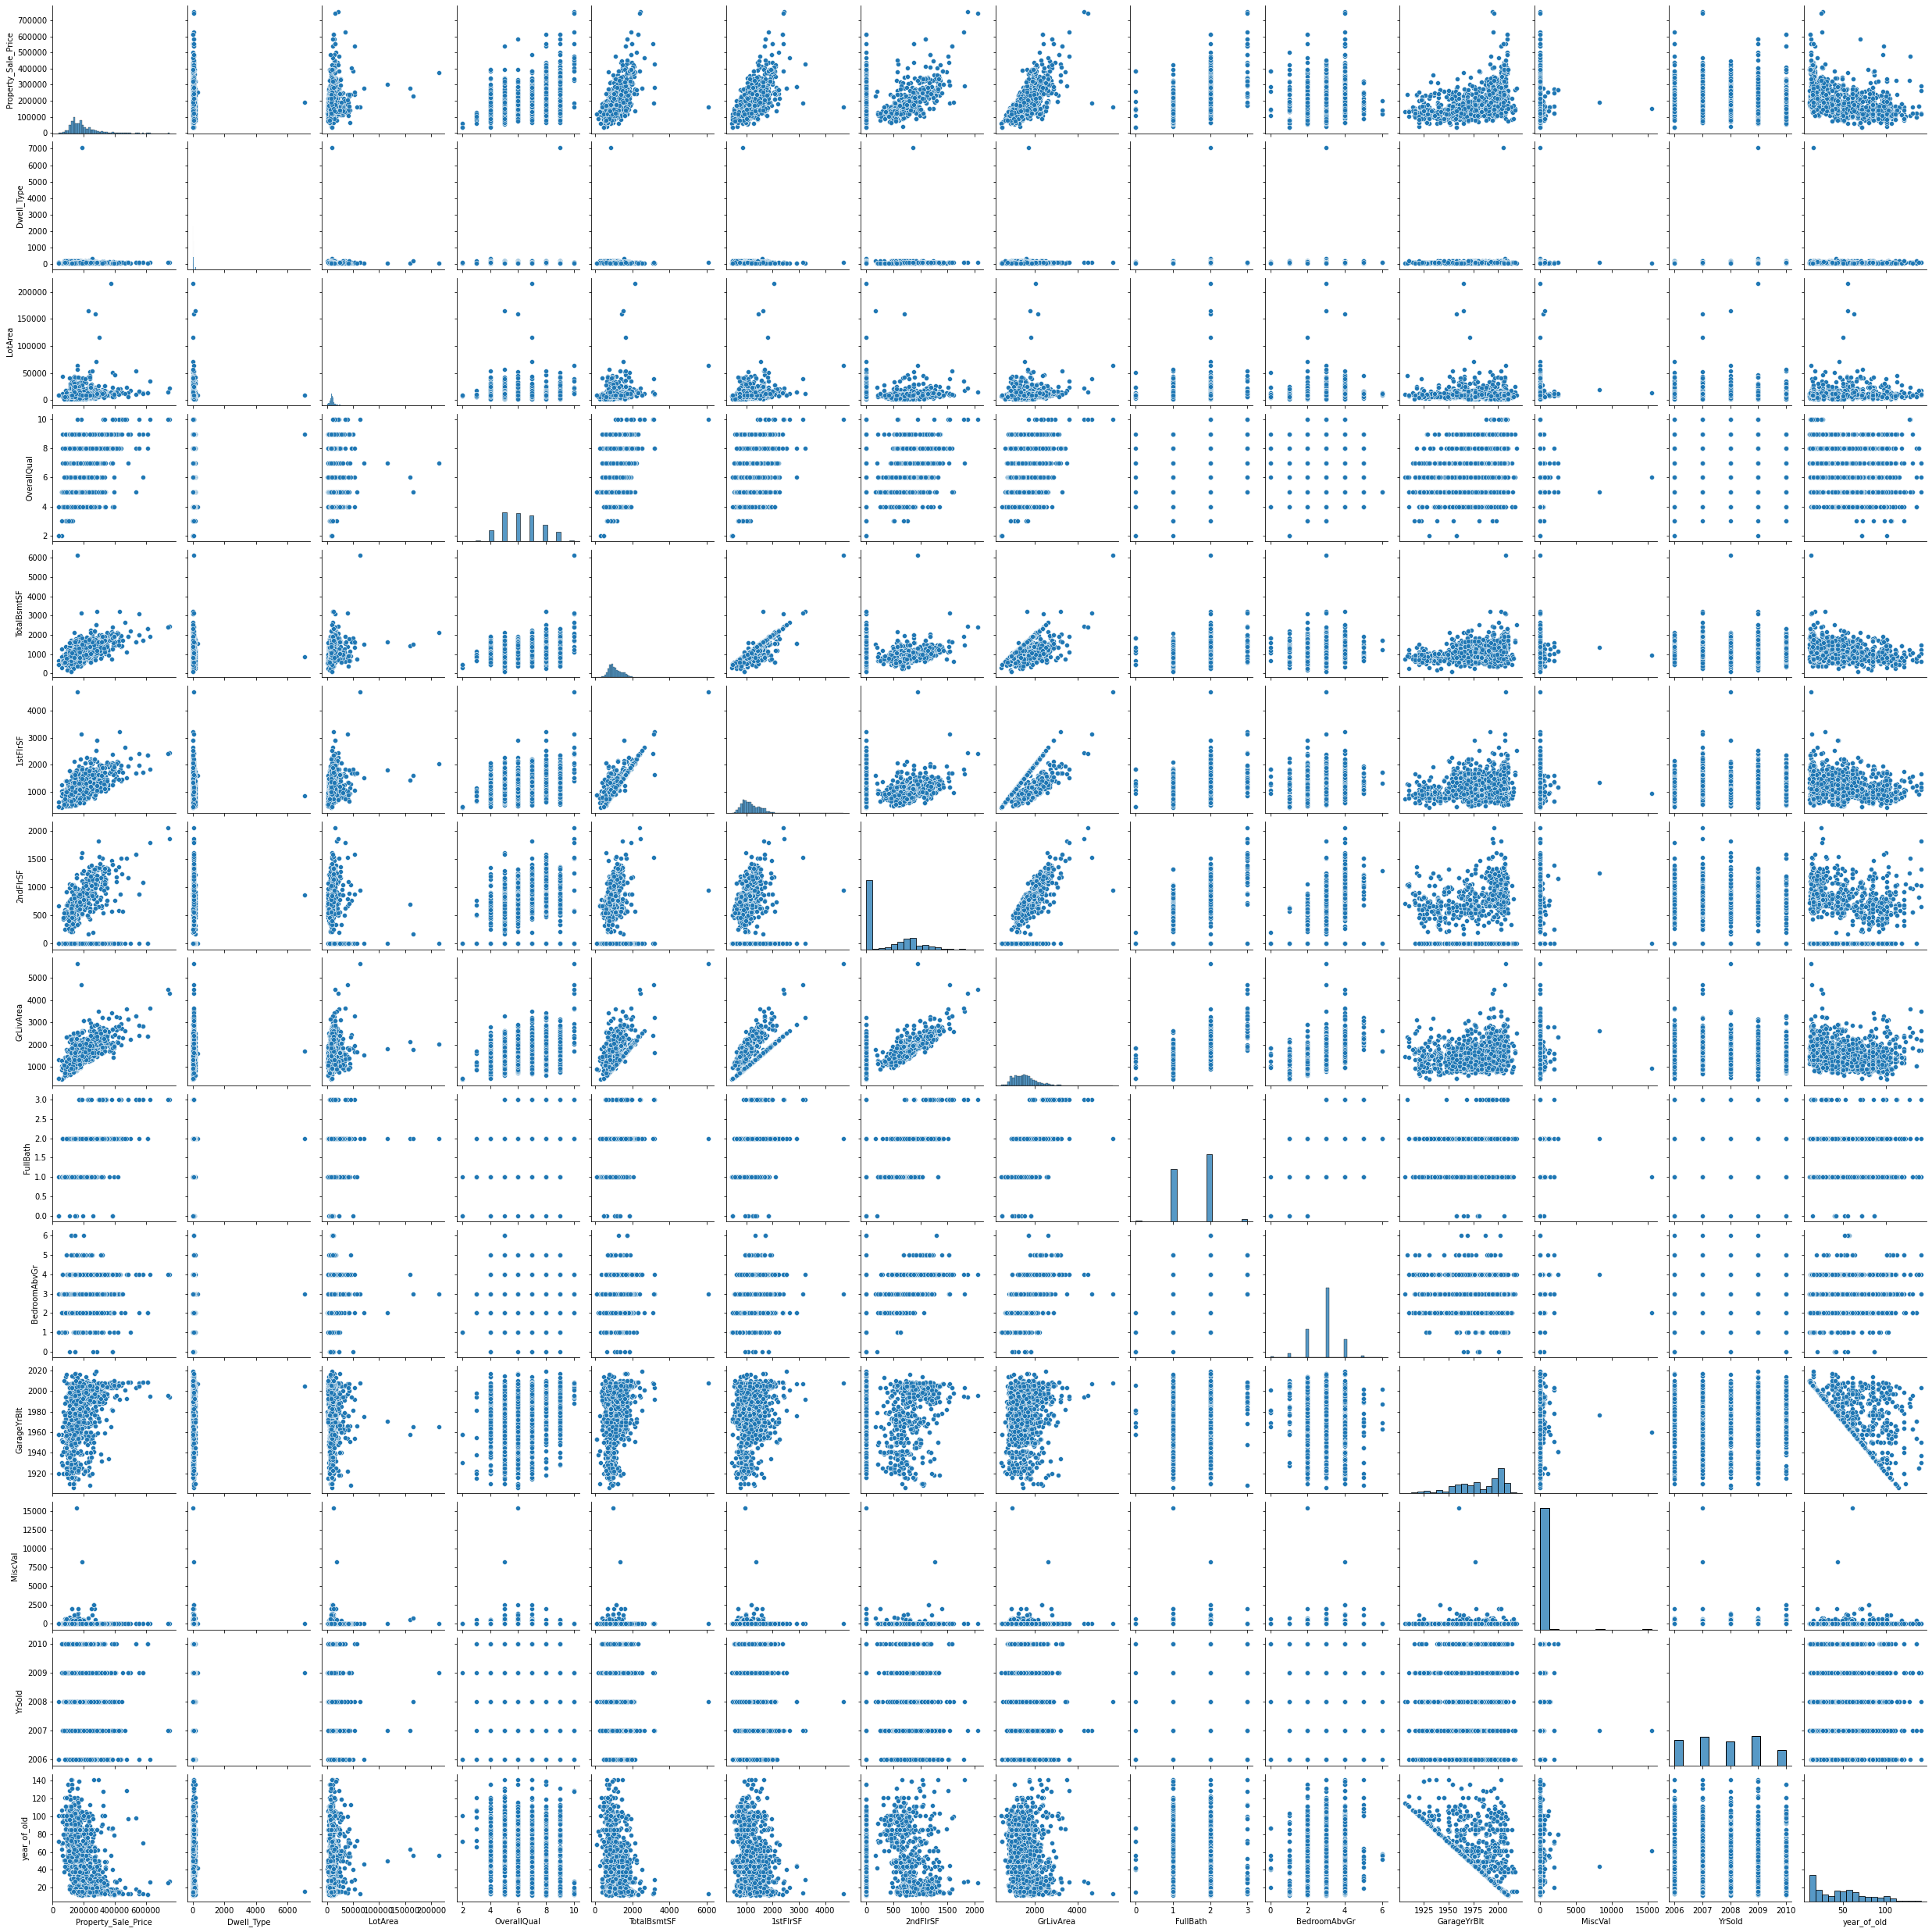

In [104]:
sns.pairplot(data)

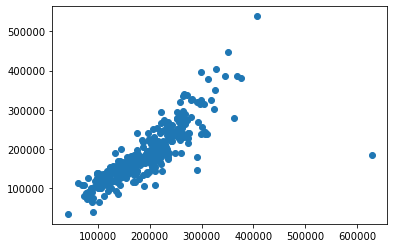

In [106]:
plt.scatter(y_test_predict , y_test)